In [1]:
#Importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
#Reading Input data
actual = pd.read_excel('D:/OLS_input.xlsx')

In [3]:
actual.head()

,Total Arrests,Unemployment Rate (2008-2012),Racial Diversity Index,Percent of Female-Headed Households with Children Under 18,Percent of Family Households Living Below the Poverty Line,Percent of People having Less than Diploma
0,323,19.2,20.115274,71.129707,20.695061,24.5
1,111,13.3,41.017612,55.187320,10.474907,14.2
2,1601,16.3,27.255998,77.529057,20.274577,18.8
3,3209,20.5,73.926734,43.393602,24.213606,34.2
4,330,4.0,26.305424,10.550459,3.661784,8.6


In [4]:
actual=actual.rename(columns={"Unemployment Rate (2008-2012)": "Unemployment Rate"})

In [5]:
#Checking for missing values
actual.isnull().sum()

Total Arrests                                                   0
Unemployment Rate                                               0
 Racial Diversity Index                                         0
 Percent of Female-Headed Households with Children Under 18     0
 Percent of Family Households Living Below the Poverty Line     0
Percent of People having Less than Diploma                      0
dtype: int64

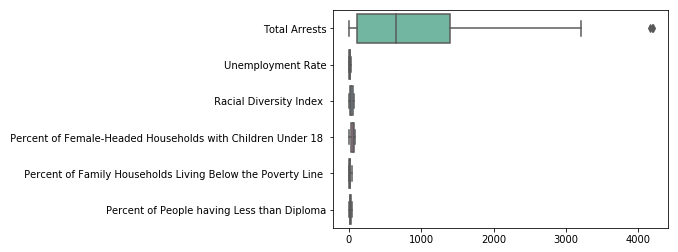

In [18]:
#To visualize variables with corresponding outliers
ax = sns.boxplot(data=actual, orient="h", palette="Set2")

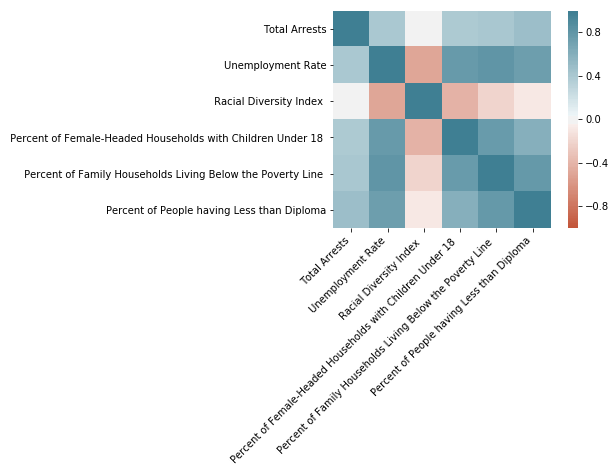

In [19]:
#Heatmap to understand corelation and causation between variables
corr = actual.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [20]:
corr_matrix = actual.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

In [21]:
sol

Unemployment Rate                                              Percent of Family Households Living Below the Poverty Line     0.819533
 Percent of Family Households Living Below the Poverty Line   Percent of People having Less than Diploma                      0.781996
Unemployment Rate                                              Percent of Female-Headed Households with Children Under 18     0.769396
 Percent of Female-Headed Households with Children Under 18    Percent of Family Households Living Below the Poverty Line     0.759104
Unemployment Rate                                             Percent of People having Less than Diploma                      0.746103
 Percent of Female-Headed Households with Children Under 18   Percent of People having Less than Diploma                      0.595377
Unemployment Rate                                              Racial Diversity Index                                         0.494183
Total Arrests                                          

In [6]:
#Applying OLS Regression

import statsmodels.api as sm
X = actual.drop('Total Arrests',axis=1)   
y = actual['Total Arrests'] 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Total Arrests   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     3.759
Date:                Tue, 25 Aug 2020   Prob (F-statistic):            0.00585
Time:                        16:52:17   Log-Likelihood:                -458.09
No. Observations:                  55   AIC:                             928.2
Df Residuals:                      49   BIC:                             940.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

C:\Users\tawde\Anaconda4\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [15]:
print(actual.keys())

Index(['Total Arrests', 'Unemployment Rate (2008-2012)',
       ' Racial Diversity Index ',
       ' Percent of Female-Headed Households with Children Under 18 ',
       ' Percent of Family Households Living Below the Poverty Line ',
       'Percent of People having Less than Diploma'],
      dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015BCA10F240>,
      dtype=object)

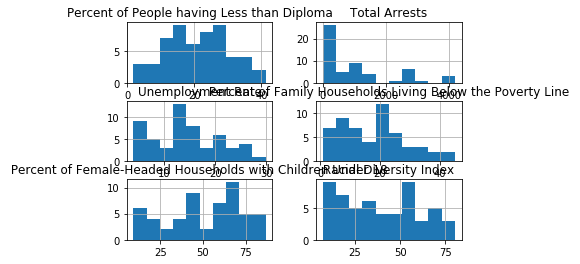

In [8]:
#Checking normality of data
actual.hist()